In [2]:
import sys
import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'./')
from importlib import reload
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import default_cosmology
from astropy import units
import astropy
from cov_3X2 import *

In [6]:
#setup parameters
lmax_cl=4000
lmin_cl=2
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=40
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=False
bin_cl=False

SSV_cov=True
tidal_SSV_cov=False

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)

In [29]:
zg=np.genfromtxt('/home/deep/repos/CCL/tests/benchmark/codecomp_step2_outputs/bin1_histo.txt',
                 names=('z','pz'))
zg_bin1=galaxy_tomo_bins(zp=zg['z']*1.01,p_zp=zg['pz'],ns=26,nz_bins=1)
zg_bin1[0]['b1']=1
bz=np.ones_like(zg['z'])

[  0 200] [0.5087875 0.5163625 0.5239375 0.5315125 0.5390875 0.5466625 0.5542375
 0.5618125 0.5693875 0.5769625 0.5845375 0.5921125 0.5996875 0.6072625
 0.6148375 0.6224125 0.6299875 0.6375625 0.6451375 0.6527125 0.6602875
 0.6678625 0.6754375 0.6830125 0.6905875 0.6981625 0.7057375 0.7133125
 0.7208875 0.7284625 0.7360375 0.7436125 0.7511875 0.7587625 0.7663375
 0.7739125 0.7814875 0.7890625 0.7966375 0.8042125 0.8117875 0.8193625
 0.8269375 0.8345125 0.8420875 0.8496625 0.8572375 0.8648125 0.8723875
 0.8799625 0.8875375 0.8951125 0.9026875 0.9102625 0.9178375 0.9254125
 0.9329875 0.9405625 0.9481375 0.9557125 0.9632875 0.9708625 0.9784375
 0.9860125 0.9935875 1.0011625 1.0087375 1.0163125 1.0238875 1.0314625
 1.0390375 1.0466125 1.0541875 1.0617625 1.0693375 1.0769125 1.0844875
 1.0920625 1.0996375 1.1072125 1.1147875 1.1223625 1.1299375 1.1375125
 1.1450875 1.1526625 1.1602375 1.1678125 1.1753875 1.1829625 1.1905375
 1.1981125 1.2056875 1.2132625 1.2208375 1.2284125 1.2359875 1.2435

In [30]:
z0=1087
zs_bin1=source_tomo_bins(zp=[z0,z0+1],p_zp=np.array([1,1]),ns=26)

[0 2] [1087 1088] [1086.9999 1088.0001]


/usr/lib/python3.7/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [31]:
power_spectra_kwargs={'pk_func':'camb_pk_too_many_z',}#'cosmo_params':cosmo_fid}

In [32]:
#use all ell
corrs=[('galaxy','shear')]
kappa0=cov_3X2(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=None,l=l0, zg_bins=zg_bin1,z_PS=zg['z'],
               use_window=False,pseudo_cl=False,corrs=corrs,galaxy_bias_func='constant_bias',power_spectra_kwargs=power_spectra_kwargs,
                SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,)#f_sky=0.35,sigma_gamma=0.37)

In [33]:
%time cl0G=kappa0.cl_tomo() 
%time cl0=cl0G['stack'].compute()

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
CPU times: user 35.5 s, sys: 16.4 ms, total: 35.5 s
Wall time: 4.53 s
CPU times: user 7.87 ms, sys: 3.32 ms, total: 11.2 ms
Wall time: 10.5 ms


(0.5, 2)

/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


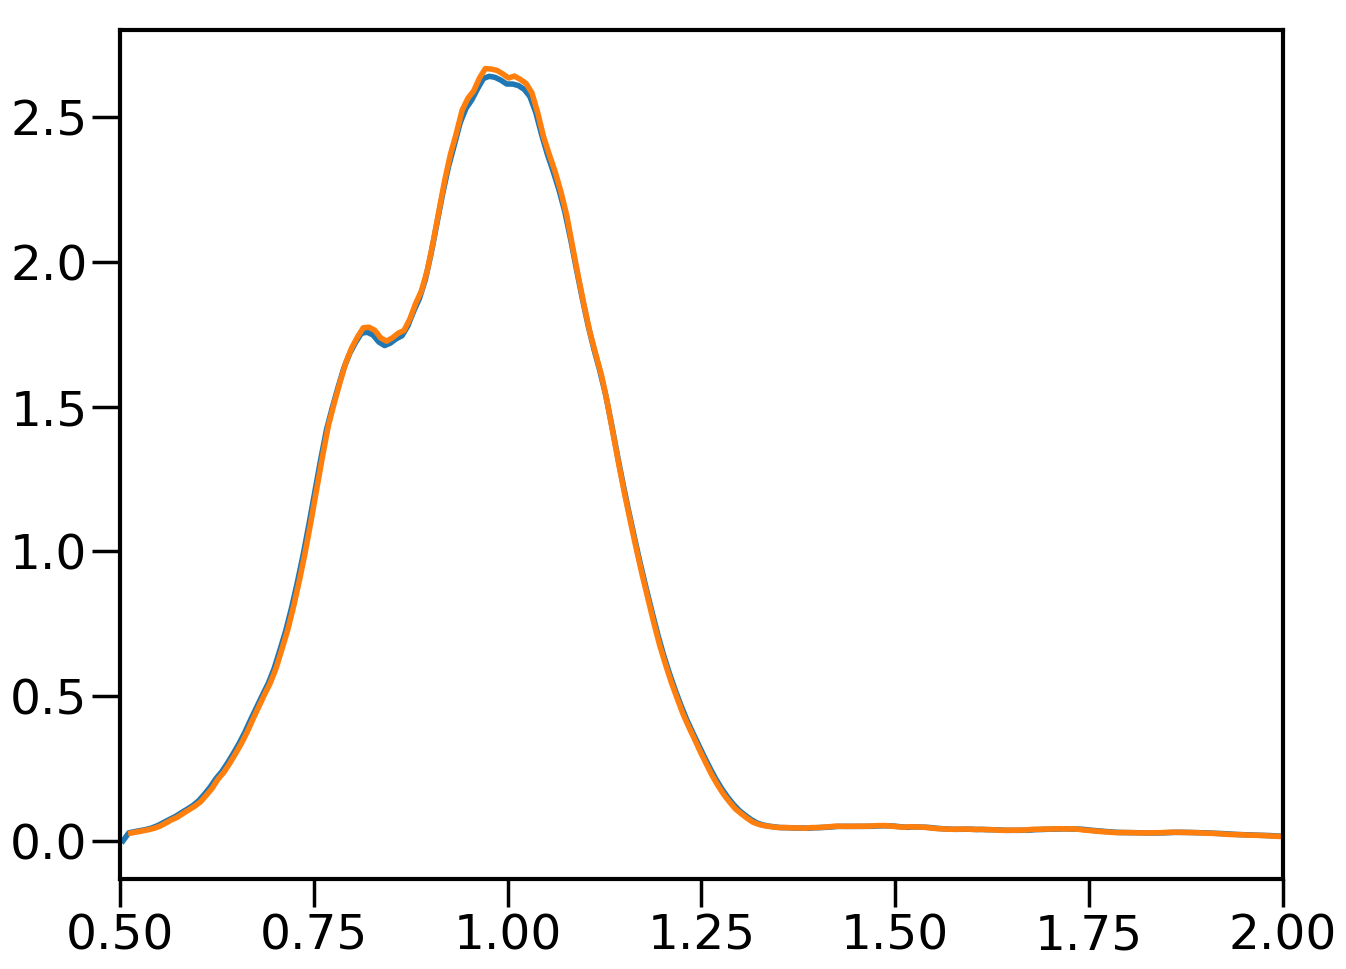

In [34]:
plot(zg_bin1[0]['z'],kappa0.z_bins['galaxy'][0]['pz'])
plot(zg['z']+0.01,zg['pz'])
xlim(0.5,2)


In [35]:
cl_test=np.genfromtxt('/home/deep/repos/gCMBl_cl_camb.dat',names=('l','cl'))

In [36]:
cl_test['cl'].shape

(3998,)

/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


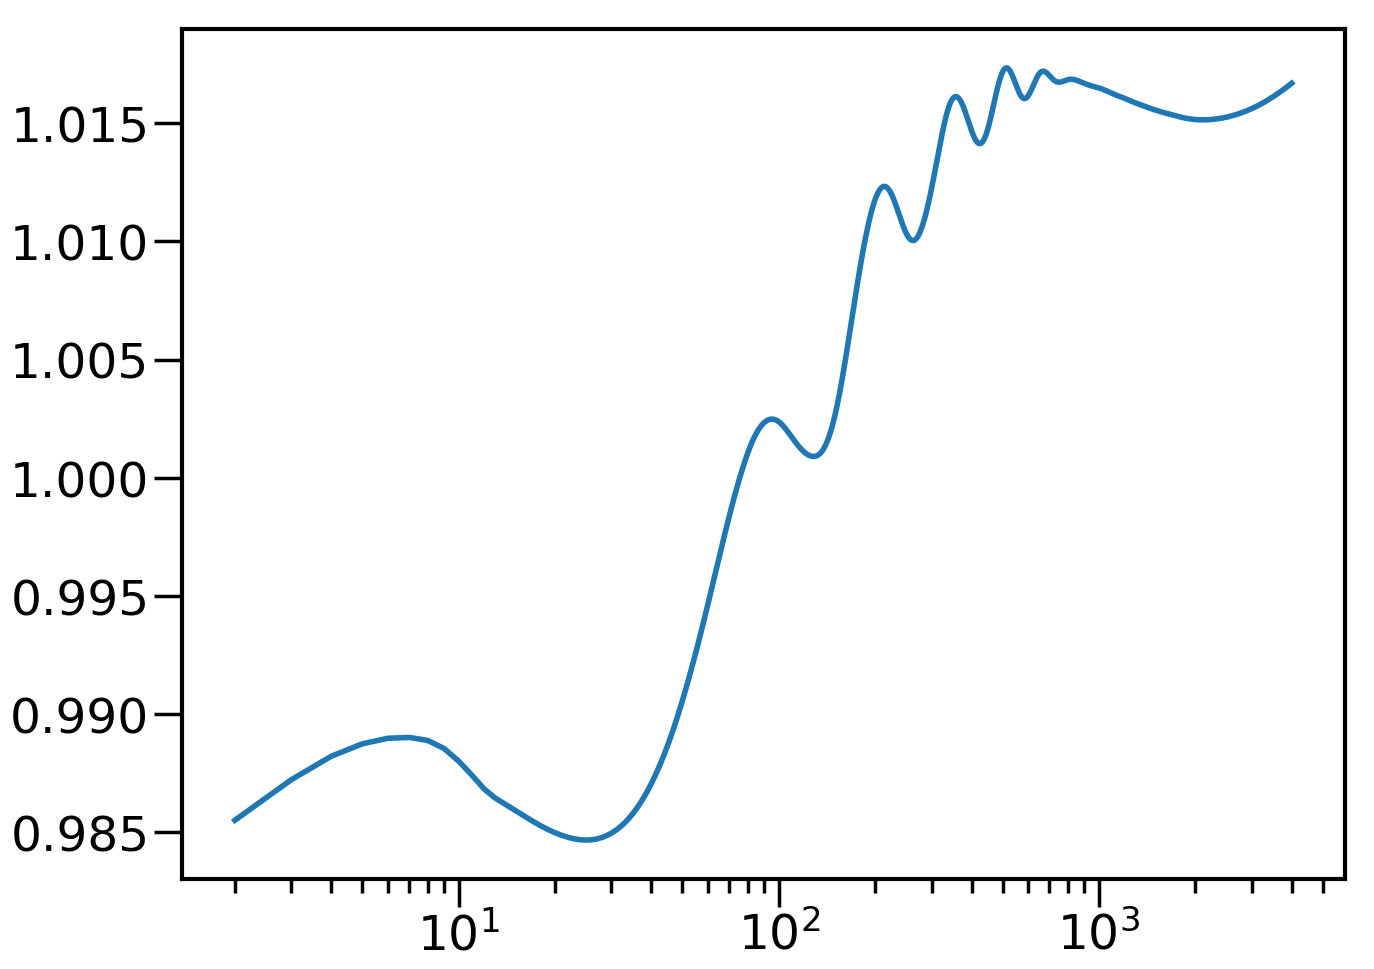

In [37]:
plot(l0,cl0['cl_b']/cl_test['cl'])
xscale('log')
# yscale('log')

/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


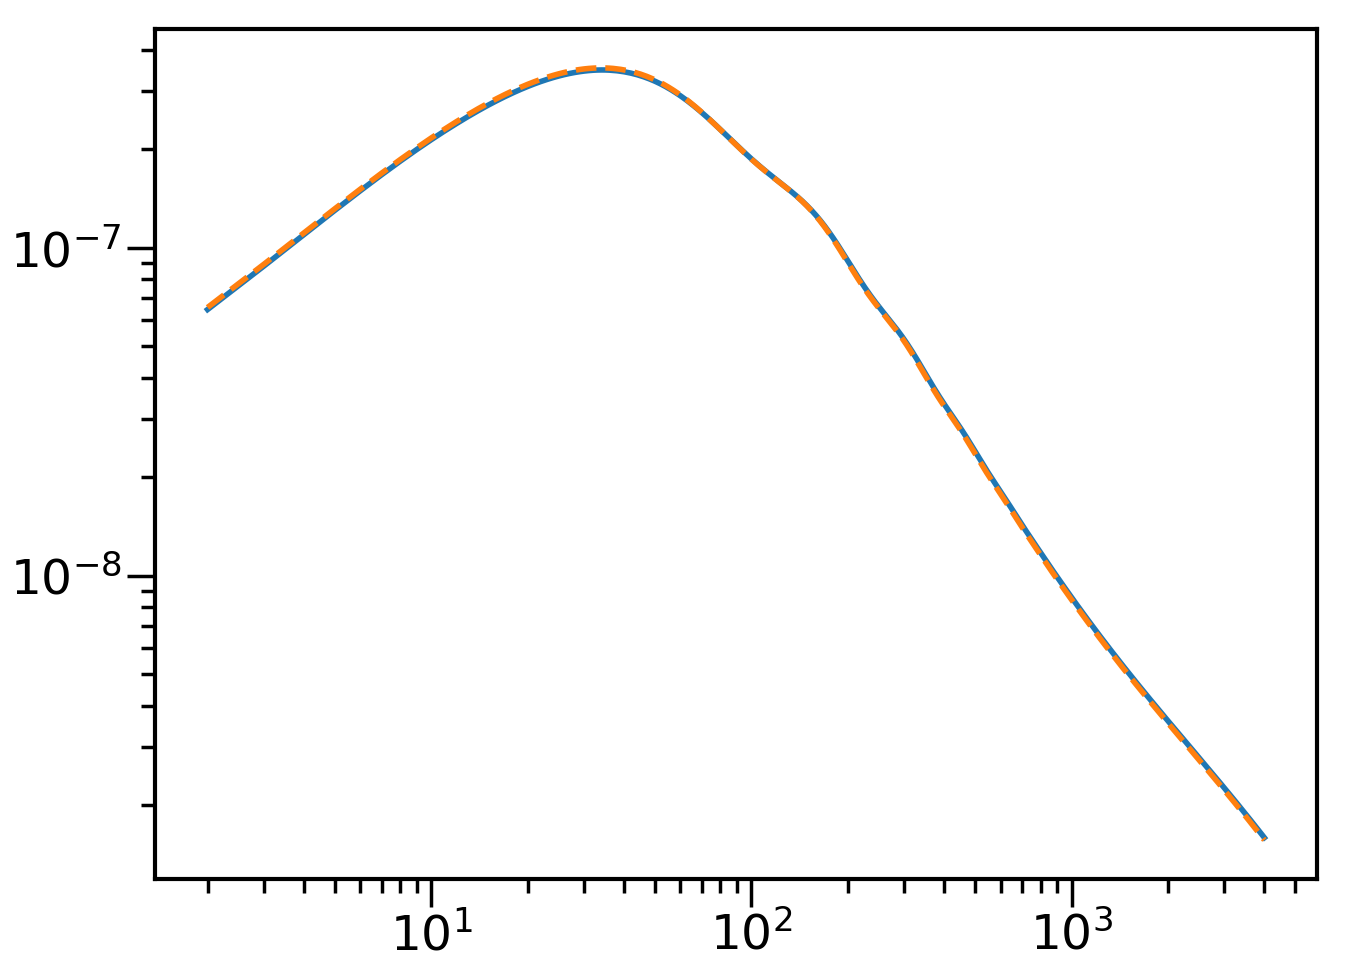

In [38]:
plot(l0,cl0['cl_b'])
plot(cl_test['l'],cl_test['cl'],'--')
xscale('log')
yscale('log')

In [12]:
crash

NameError: name 'crash' is not defined

In [ ]:
params_ccl1=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, Neff=0)
cosmo_ccl1 = ccl.Cosmology(params_ccl1)


In [ ]:
tracer_g=ccl.ClTracerNumberCounts(cosmo_ccl1,False,False,(zg['z'],zg['pz']),(zg['z'],bz))

In [ ]:
zg['z'][-2:]

In [ ]:
zg.shape

In [ ]:
tracer_L=ccl.ClTracerLensing(cosmo_ccl1,False,(zg['z'],zg['pz']))

In [ ]:
ells=np.arange(2000)+1

In [ ]:
ccl.angular_cl(cosmo_ccl1,tracer_g,tracer_L,ells,dlk=0.01)

In [ ]:
kappa0.cl

In [ ]:
theta=np.linspace(0.001,0.01,10)

In [ ]:
def covariance_brute_force(l=[],theta=[],cl12=[],j_nu=0):
    J=jn(j_nu,np.outer(theta,l))
    dl=np.gradient(l)
    print(J.shape,cl12.shape)
    cov=np.dot(J,(J*cl12*l*dl).T)
    cov/=2*np.pi
    return cov

In [ ]:
c2=covariance_brute_force(l=l0,cl12=cl0['cl_b']**2,theta=theta)

In [ ]:
#setup parameters
lmax_cl=2000
lmin_cl=2
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=40
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=False
bin_cl=False

SSV_cov=True
tidal_SSV_cov=False

do_xi=True
bin_xi=True
do_cov=True
bin_cl=False
th_min=2.5/60
th_max=250./60
n_th_bins=20
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins*60)
thb=0.5*(th_bins[1:]+th_bins[:-1])
sigma_e=0.3944
sigma_gamma=0.3944/sqrt(2.)

In [ ]:
#Hankel Transform setup
l_max=1e4
l_min=2
l0=np.unique(np.int32(np.logspace(np.log10(l_min),np.log10(l_max),3.e4)))   #np.arange(l_min,l_max)
prune_theta=0
HT_kwargs={'l_min':l_min,  'l_max':l_max,
                        'theta_min':th_min*d2r*.9, 'theta_max':th_max*d2r,
                        'n_zeros':40000, 'prune_theta':prune_theta, 'm1_m2':[(2,2),(2,-2)]}
# %time HT=hankel_transform(**HT_kwargs)
# HT_kwargs2={'l_min':l_min,  'l_max':l_max,
#                         'theta_min':th_min*d2r*.9, 'theta_max':th_max*d2r,
#                         'n_zeros':40000, 'prune_theta':2, 'm1_m2':[(2,-2)]}#,(2,-2)]}

In [ ]:
do_sample_variance=False
use_window=False
tidal_SSV=False
do_SSV=False
f_sky=0.3

In [ ]:
XI_H =cov_3X2(zs_bins=zs_bin1,l=l0,do_cov=do_cov,bin_cl=bin_cl,zg_bins=None,l_bins=l_bins,
              do_sample_variance=do_sample_variance,use_window=use_window,
              power_spectra_kwargs=power_spectra_kwargs,
               SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV,do_xi=True,HT_kwargs=HT_kwargs,f_sky=f_sky,
               bin_xi=bin_xi,theta_bins=th_bins,sigma_gamma=sigma_gamma)#ns=np.inf)

In [ ]:
%time clG=XI_H.xi_tomo()
%time clH=clG['stack'].compute()

In [ ]:
%time xiHG=XI_H.xi_tomo()
%time xiH=xiHG['stack'].compute()


In [ ]:
sn=XI_H.SN[('shear','shear')][0]

In [ ]:
c2=covariance_brute_force(l=l0,cl12=np.ones_like(l0)*sn**2,theta=XI_H.HT.theta[(2,2)])

In [ ]:
m1_m2=(2,2)
c2b=XI_H.binning.bin_2d(cov=c2,bin_utils=XI_H.xi_bin_utils[m1_m2])

In [ ]:
norm=4*np.pi*f_sky

In [ ]:
plot(thb,np.diag(c2b/norm)*2)
plot(thb,np.diag(xiH['cov'][:20,:20]),'--')
xscale('log')
yscale('log')

In [ ]:
dthb=th_bins[1:]-th_bins[:-1]

In [ ]:
n_gal=26 #DES first bin
n_gal_rad=n_gal*60.*60./d2r**2

In [ ]:
norm=4*np.pi*f_sky

In [ ]:
n_gal_rad

In [ ]:
N1=2*np.pi*norm*n_gal_rad**2
N2=(thb*dthb*d2r**2)**2
N2/=thb*dthb*d2r**2

In [ ]:
6./d2r

In [ ]:
SN22=sigma_e**4/N1/N2

In [ ]:
plot(thb,np.diag(xiH['cov'][:20,:20])*2,'--')
plot(thb,SN22,':')
xscale('log')
yscale('log')